# KNN Algorithm

1. Calculate distances from datapoint to all other points.
2. Find k nearest points.
3. Find the labels of the k nearest points.
4. Calculate votes of for each label from the k points.
5. Classify the datapoint as the label with maximum number of votes.

In [238]:
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns

In [239]:
df = pd.read_csv(r"C:\Users\HAMID OMAR\Desktop\Data Science\Iris.csv")

In [240]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [241]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [242]:
data_arr = df.values
labels = data_arr[:,-1]
train_arr = data_arr[:,1:5]
n = train_arr.shape[0]
categ_var = train_arr.shape[1]

In [243]:
label_vals = np.unique(labels)
label_vals

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

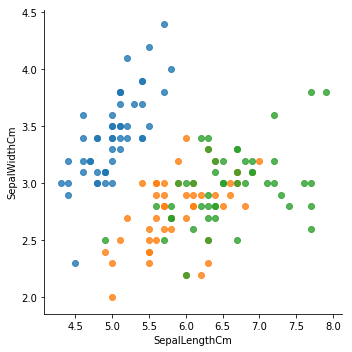

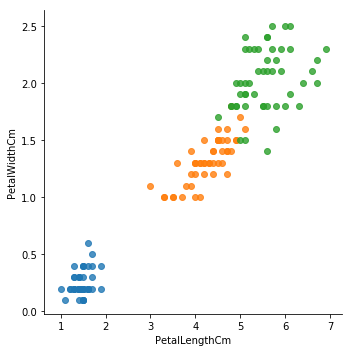

In [244]:
sns.lmplot( x="SepalLengthCm", y="SepalWidthCm", data=df, fit_reg=False, hue='Species', legend=False)
sns.lmplot( x="PetalLengthCm", y="PetalWidthCm", data=df, fit_reg=False, hue='Species', legend=False)

In [245]:
def distance(datapoint,train_dp):
    temp = 0
    for i in range(categ_var):
        temp = temp + np.square(datapoint[i]-train_dp[i])
    distance = np.sqrt(temp)
    return distance

In [251]:
def predict(datapoint,k):
    sorted_distances = []
    distances = []
    votes = [0,0,0]
    
    for j in range(n):
        distances.append(distance(datapoint,train_arr[j])) 
        
    sorted_dist = np.sort(distances)
    
    for i in range(k):
        index = np.where(distances == sorted_dist[i])
        var = labels[index][0]
        
        if(var == "Iris-setosa"):
            votes[0] = votes[0]+1
        
        elif(var == "Iris-versicolor"):
            votes[1] = votes[1]+1
           
        elif(var == "Iris-virginica"):
            votes[2] = votes[2]+1
        
    return label_vals[np.argmax(votes)]

# Predicting on random data points

In [252]:
print('Expected %s, Got %s.' % (labels[147],predict([6.3, 2.5, 5.0, 1.9],2)))

Expected Iris-virginica, Got Iris-virginica.


In [253]:
print('Expected %s, Got %s.' % (labels[50],predict([7.0, 3.2, 4.7, 1.4],6)))

Expected Iris-versicolor, Got Iris-versicolor.


In [256]:
print('Expected %s, Got %s.' % (labels[0],predict([5.1, 3.5, 1.4, 0.2],6)))

Expected Iris-setosa, Got Iris-setosa.
